In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import fsolve

In [2]:
def endpt(pt, ang, length):
    x, y = pt
    endy = y + length * np.sin(ang)
    endx = x + length * np.cos(ang)
    return endx, endy

def plotarms(x,y,beta,a,b,sol):

    fig = plt.figure(figsize = (12,6))

    startx, starty = (0,0)
    endx, endy = endpt((startx,starty),sol[0],a)
    plt.plot([startx, endx], [starty, endy], '-r', linewidth=4)
    plt.plot([startx], [starty], 'ko',markersize=12)
    plt.plot([endx], [endy], 'ko',markersize=12)
    plt.text(startx-0.3, starty+0.3, r'$A$', fontsize=20)
    plt.text(endx, endy+0.3, r'$B$', fontsize=20)
    plt.text(startx+0.8, starty, r'$\theta_1$', fontsize=20)
    plt.plot([endx, x], [endy, y], '-g', linewidth=4)
    plt.plot([x], [y], 'ko',markersize=12)
    plt.text(x, y-1, r'$C$', fontsize=20)
    plt.text(endx-0.5, endy-1.2, r'$\theta_2$', fontsize=20)
    plt.text(x-0.2, y+0.5, r'$\theta_3$', fontsize=20)
    plt.plot([x, x+2], [y, y], '--k')
    plt.plot([x, x+2*np.cos(beta)], [y, y+2*np.sin(beta)], '--k')
    plt.text(x+np.cos(beta), y, r'$\beta$', fontsize=20)

    plt.xlim(-1,a+b)
    plt.ylim(-1,0.8*a)
    plt.show()


In [5]:
def func(xvec, *args):   
    #xvec = (theta1, theta2, theta3)   
    a,b,x,y,beta  = args
    
    c      = np.sqrt(x**2 + y**2)    
    alpha2 = np.arcsin(y/c)
    
    f = np.zeros(3)
    
    f[0] = a**2 + b**2 - 2*a*b*np.cos(xvec[1]) - c**2    
    f[1] = a**2 + c**2 - 2*a*c*np.cos(xvec[0] - alpha2) - b**2
    f[2] = xvec[0] + xvec[1]- xvec[2] - beta
    
    return f

def dfunc(xvec, *args):
    # A function to compute the Jacobian of func with derivatives across the rows.      
    #xvec = (theta1, theta2, theta3)
    a,b,x,y,beta  = args
      
    c      = np.sqrt(x**2 + y**2)    
    alpha2 = np.arcsin(y/c)
    
    df = np.zeros((3,3))
    
    df[0,0] = 0
    df[0,1] = 2*a*b*np.sin(xvec[1])   
    df[0,2] = 0
    
    df[1,0] = 2*a*c*np.sin(xvec[0] - alpha2) 
    df[1,1] = 0  
    df[1,2] = 0

    df[2,0] = 1
    df[2,1] = 1 
    df[2,2] = -1
    
    return df

In [10]:
# Define desired position for the robotic hand
x = 8
y = 2
beta = np.pi/4
# Given arm lengths:
a = 10
b = 5
# Create tuple with optional problem parameters
const = (a,b,x,y,beta)

# Set initial guess
c = np.sqrt(x**2+y**2)
theta1guess = np.pi/2
theta2guess = np.arccos( (a**2+b**2-c**2)/(2*a*b) )
theta3guess = theta1guess+theta2guess
xguess = [theta1guess,theta2guess,theta3guess]
print(np.degrees(xguess))

[  90.           55.24977425  145.24977425]


[ 43.9169153   55.24977425  54.16668955]
number of function evaluations =  11


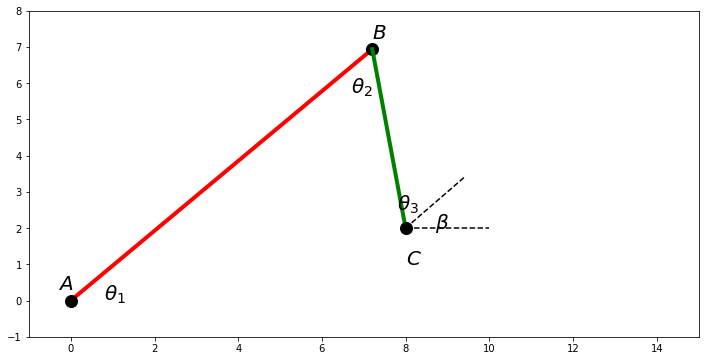

In [11]:
# Solve for the unknowns using fsolve (only function provided)
# sol = [theta1, theta2, theta3]
(sol,info,ier,msg) = fsolve(func, xguess, const, full_output=True)
print(np.degrees(sol))
print('number of function evaluations = ', info['nfev'])
plotarms(x,y,beta,a,b,sol)

[  33.03918067  103.29707175   91.33625241]
number of function evaluations =  9
number of jacobian evaluations =  1


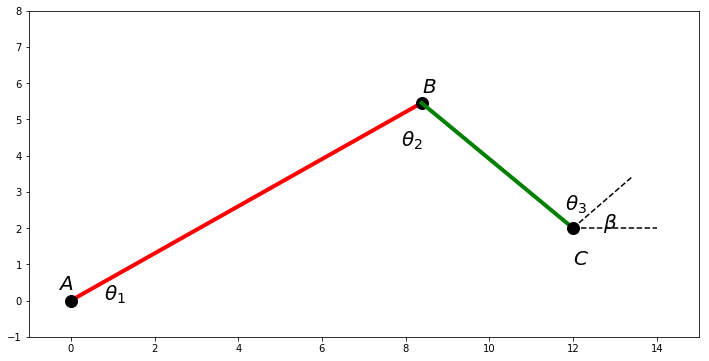

In [8]:
# Solve for the unknowns using fsolve  (function and jacobian provided)
# sol = [theta1, theta2, theta3]
(sol,info,ier,msg) = fsolve(func, xguess, args=const, full_output=True, fprime = dfunc)
print(np.degrees(sol))
print('number of function evaluations = ', info['nfev'])
print('number of jacobian evaluations = ', info['njev'])
plotarms(x,y,beta,a,b,sol)

In [12]:
#Implementing Newton Method
#x = xguess
x = np.random.uniform(low=np.pi/10, high=np.pi/2, size=(3,))
er = 1
count = 0
while er > 1e-9 and count < 100:
    count += 1
    h = la.solve(dfunc(x,*const), func(x,*const))
    x = x - h
    er = la.norm(h)
print('number of function evaluations = ', count)
print(np.degrees(x))

number of function evaluations =  6
[ 43.9169153   55.24977425  54.16668955]
